# Import Libraries

In [1]:
from matplotlib import pyplot as plt # plot
from matplotlib.image import imread # read data gambar
import numpy as np # numerical operation
import os # basic operating system.

# Read Images

In [2]:
dataset_path = 'Dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [3]:

train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
# ngebuat empty tensor
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

Train Images:


In [5]:
training_tensor[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [4]:
training_tensor.shape

(8, 45045)

Train Images:


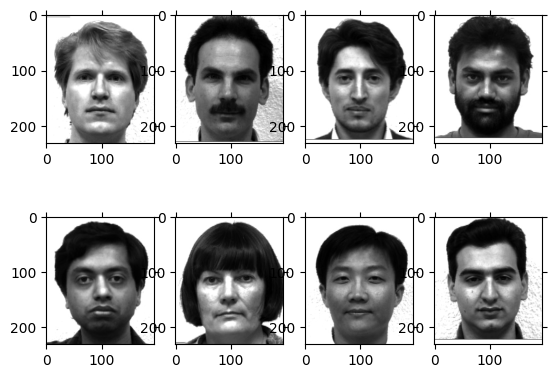

Test Images:


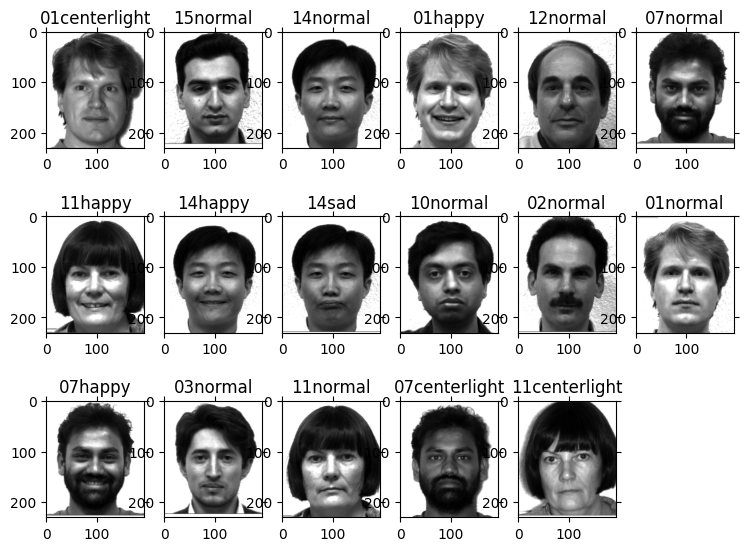

In [7]:
print('Train Images:')
for i in range(len(train_image_names)):
    # read images
    img = plt.imread(dataset_path + train_image_names[i])
    # replace perelement dengan representasi array masing-masing images
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# How can we implement EigenFaces?

## Implement PCA

### 1. Hitung Mean dari Dataset Face

In [13]:
training_tensor[0] + training_tensor[1] + training_tensor[2]

array([765., 765., 765., ..., 765., 765., 765.])

In [11]:
mean_face = np.zeros((1, height * width)) # 1 * 45045 <- rata-rata vector yang ada pada dataset

for img in training_tensor:
    mean_face = np.add(mean_face, img)
mean_face

array([[2040., 2040., 2040., ..., 1881., 1864., 1856.]])

In [14]:
mean_face = np.divide(mean_face, float(len(training_tensor)))

In [16]:
mean_face = mean_face.flatten()
mean_face.shape

(45045,)

### 2. Normalize Face

Proses ini kita akan melakukan pengurangan vektor rata-rata wajah dengan data point yangg ada

In [17]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height * width)) # 8 * 45045
normalised_training_tensor.shape

(8, 45045)

In [19]:
# Pengurangan rata-rata vektor dengan setiap data point yang ada
for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i], mean_face)

In [20]:
normalised_training_tensor

array([[   0.   ,    0.   ,    0.   , ...,   19.875,   22.   ,   23.   ],
       [   0.   ,    0.   ,    0.   , ...,   19.875,   22.   ,   23.   ],
       [   0.   ,    0.   ,    0.   , ...,   19.875,   22.   ,   23.   ],
       ...,
       [   0.   ,    0.   ,    0.   , ..., -124.125, -126.   , -114.   ],
       [   0.   ,    0.   ,    0.   , ...,   19.875,   22.   ,   23.   ],
       [   0.   ,    0.   ,    0.   , ...,   19.875,   22.   ,   23.   ]])

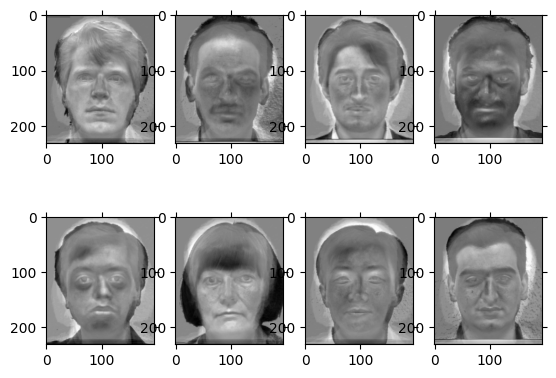

In [21]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### 3. Hitung Covariance Matrix

In [22]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix, 8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]


### 4. Find Eigenvector and Eigenface

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.24216786 -0.23304127  0.35355339 -0.54650028  0.34900164  0.24263134
  -0.46008264 -0.26652539]
 [-0.2320557   0.21004915  0.35355339  0.28336041  0.66156373 -0.40750816
   0.14797794 -0.26666354]
 [-0.15104702 -0.0756895   0.35355339  0.19555006 -0.49779746 -0.46987952
  -0.57605919 -0.08822017]
 [-0.41563654  0.18098142  0.35355339 -0.49133856 -0.36828479  0.0496277
   0.45683638 -0.28510056]
 [ 0.05114387 -0.48868195  0.35355339 -0.17720876  0.0789403  -0.29622126
   0.28068609  0.65529232]
 [ 0.73015769  0.53226997  0.35355339  0.03110374 -0.15710617 -0.06932017
   0.14579398  0.08274941]
 [ 0.14350419 -0.47101419  0.35355339  0.52641965 -0.14266291  0.41459652
   0.25325285 -0.31472933]
 [-0.36823436  0.34512637  0.35355339  0.17861375  0.07634566  0.53607356
  -0.2484054   0.48319727]]

Eigenvalues of Cov(X): 
[1.11554951e+03 4.85892625e+02 6.38493880e-14 1.22955135e+02
 2.95284929e+02 1.76427142e+02 2.32097712e+02 2.28059153e+02]


In [25]:
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range(len(eigenvalues))]
eig_pairs

[(1115.5495084988224,
  array([ 0.24216786, -0.2320557 , -0.15104702, -0.41563654,  0.05114387,
          0.73015769,  0.14350419, -0.36823436])),
 (485.8926245803427,
  array([-0.23304127,  0.21004915, -0.0756895 ,  0.18098142, -0.48868195,
          0.53226997, -0.47101419,  0.34512637])),
 (6.384938804381117e-14,
  array([0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
         0.35355339, 0.35355339, 0.35355339])),
 (122.95513549958075,
  array([-0.54650028,  0.28336041,  0.19555006, -0.49133856, -0.17720876,
          0.03110374,  0.52641965,  0.17861375])),
 (295.28492949861436,
  array([ 0.34900164,  0.66156373, -0.49779746, -0.36828479,  0.0789403 ,
         -0.15710617, -0.14266291,  0.07634566])),
 (176.4271416272427,
  array([ 0.24263134, -0.40750816, -0.46987952,  0.0496277 , -0.29622126,
         -0.06932017,  0.41459652,  0.53607356])),
 (232.0977124144739,
  array([-0.46008264,  0.14797794, -0.57605919,  0.45683638,  0.28068609,
          0.14579398,  0.25325

In [26]:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

### 5. Find Cumulative Variance untuk Masing-masing Principle Component

Cumulative proportion of variance explained vector: 
[0.41996902 0.60289218 0.7140576  0.80143503 0.88729207 0.95371129
 1.         1.        ]


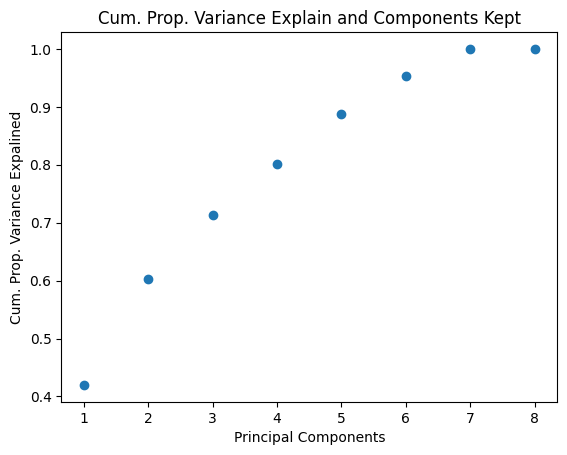

In [27]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## No of PCA

In [28]:
reduced_data = np.array(eigvectors_sort[:7]).transpose()
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

## Plot Feature Extraction

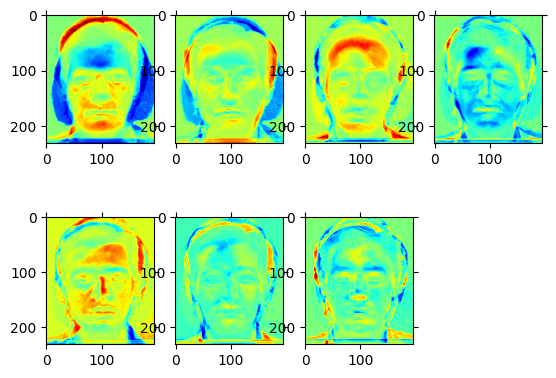

In [29]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()